In [6]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_column',None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
#loading the dataset
df=pd.read_csv('../input/performance-prediction/summary.csv')
df

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [8]:
#checking for missingvalues
df.isna().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

In [24]:
#preprocessing 
def preprocessing_inputs(df):
    df=df.copy()
    #dropping names column from the dataset
    df=df.drop('Name',axis=1)
    #filling missing  values in 3PointPercent
    df['3PointPercent']=df['3PointPercent'].fillna(df['3PointPercent'].mean())
    #spliting the dataset
    y=df['Target']
    x=df.drop('Target',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    #scaling the dataset
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns,index=x_test.index)
    
    
    
    
    return x_train,x_test,y_train,y_test

In [25]:
x_train,x_test,y_train,y_test=preprocessing_inputs(df)
print(x_train.shape)
print(x_test.shape)

(937, 19)
(403, 19)


In [27]:
y_train

363     1
10      0
971     1
634     0
554     0
       ..
715     1
905     1
1096    0
235     1
1061    1
Name: Target, Length: 937, dtype: int64

In [26]:
x_train

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
363,0.997082,0.307933,0.564884,0.451871,0.073885,1.926287,-0.642652,-0.730700,-1.209549,1.088689,1.164907,0.114375,1.193755,0.887792,1.039916,-0.379602,-1.010958,0.083905,0.398906
10,-1.516114,-1.319111,-1.053689,-1.053615,-0.991202,-1.287836,-0.642652,-0.637536,0.919258,-0.818606,-0.932725,1.099251,-0.688418,-1.300919,-1.073535,-0.578978,-1.249926,-0.635171,-1.242257
971,1.230868,-0.226320,-0.267525,-0.391201,-0.234429,-0.651708,0.922090,0.946261,1.008758,-0.316686,-0.483233,0.735899,-0.285095,-0.168827,-0.218090,-0.180226,0.183880,-0.395479,-0.148148
634,-2.275918,-0.517731,-0.776219,-0.872957,-0.598801,-2.158328,-0.381862,0.014616,-0.499947,-0.316686,-0.408317,1.127937,-0.957300,-0.697136,-0.771613,0.351444,-0.055088,-0.155787,0.125379
554,0.880189,0.368643,-0.059423,-0.029885,0.129943,-0.584747,-0.381862,-0.544371,0.292762,0.084850,-0.033740,0.898451,-0.957300,-0.546191,-0.721293,1.148949,1.378719,-0.635171,1.356251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.880189,0.052948,-0.059423,-0.090104,-0.010200,-0.300163,1.443671,1.225755,1.315613,-0.517454,-0.707979,1.606031,-0.822859,-0.244300,-0.469692,-0.379602,-0.771991,-0.635171,-0.284912
905,0.938636,-0.165610,-0.105667,-0.150324,-0.262458,0.553589,-0.121071,-0.358042,1.264470,0.185234,0.116091,0.324737,0.118228,-0.168827,-0.067129,-0.512520,0.900783,-0.155787,-0.284912
1096,-0.639418,0.975749,0.749864,0.572310,0.606429,0.118343,1.182881,1.039426,1.123828,0.787537,0.640499,0.755023,0.118228,0.284010,0.234792,0.019150,2.095622,0.083905,-0.148148
235,-1.165435,-1.476958,-1.030566,-1.053615,-1.103316,-0.333643,-0.642652,-0.730700,-1.209549,-0.617838,-0.558148,-0.201167,-0.688418,-1.149973,-1.023214,-0.911272,-1.010958,-0.635171,-1.242257


# Training 

In [29]:
#training the model
model=LogisticRegression()
model.fit(x_train,y_train)
acc=model.score(x_test,y_test)

In [30]:
print('Test Accuracy {:2f}%'.format(acc*100))

Test Accuracy 70.719603%


# Clustering (k-means)

In [32]:
#Number of cluster to create 
kmeans=KMeans(n_clusters=4)
kmeans.fit(x_train)

KMeans(n_clusters=4)

In [36]:
#Creating two dimension feature with Principal Component Analysis
pca=PCA(n_components=2)
#transforming the x_train dataset with PCA
x_reduced=pd.DataFrame(pca.fit_transform(x_train),index=x_train.index,columns=['PC1','PC2'])


In [37]:
x_reduced

,PC1,PC2
363,1.858379,2.680904
10,-3.918799,-0.832184
971,-0.372334,-1.690180
634,-2.197657,-1.326911
554,0.556465,-1.539912
...,...,...
715,-0.603175,-2.408503
905,0.109021,-0.130642
1096,2.142061,-1.688440
235,-3.806854,0.707097


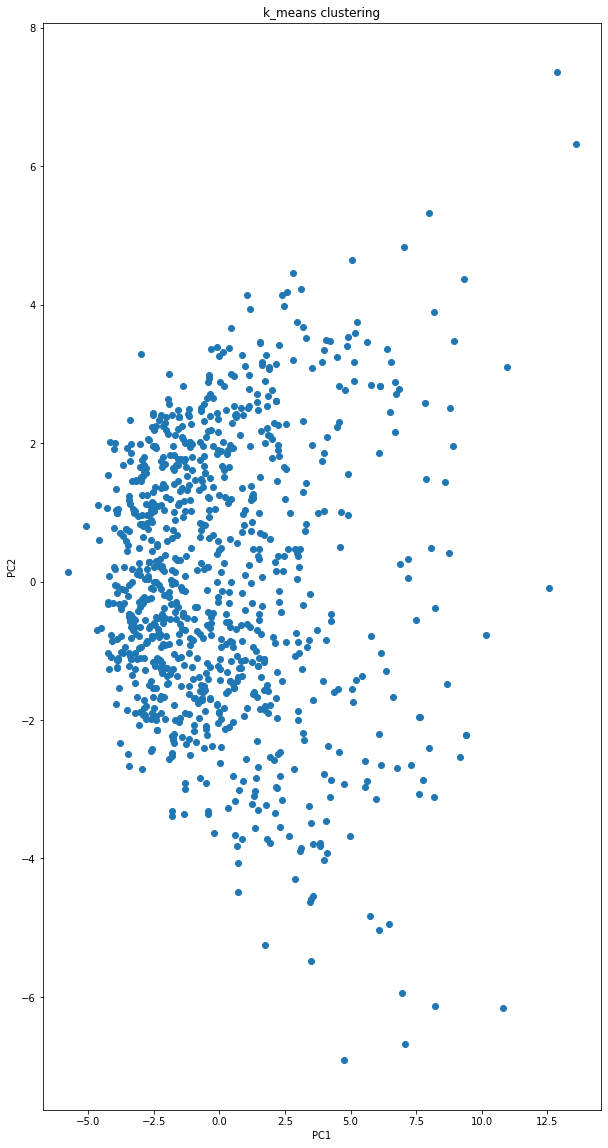

In [38]:
#creating scatterplot
plt.figure(figsize=(10,20))
plt.scatter(x_reduced['PC1'],x_reduced['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k_means clustering')
plt.show()

In [40]:
#assigning cluster 
clusters=pd.Series(kmeans.labels_,name='Cluster',index=x_train.index)
#addting clusters with x_reduced
x_reduced=pd.concat([x_reduced,y_train,clusters],axis=1)

In [41]:
x_reduced

,PC1,PC2,Target,Cluster
363,1.858379,2.680904,1,2
10,-3.918799,-0.832184,0,1
971,-0.372334,-1.690180,1,0
634,-2.197657,-1.326911,0,1
554,0.556465,-1.539912,0,0
...,...,...,...,...
715,-0.603175,-2.408503,1,0
905,0.109021,-0.130642,1,0
1096,2.142061,-1.688440,0,0
235,-3.806854,0.707097,1,1


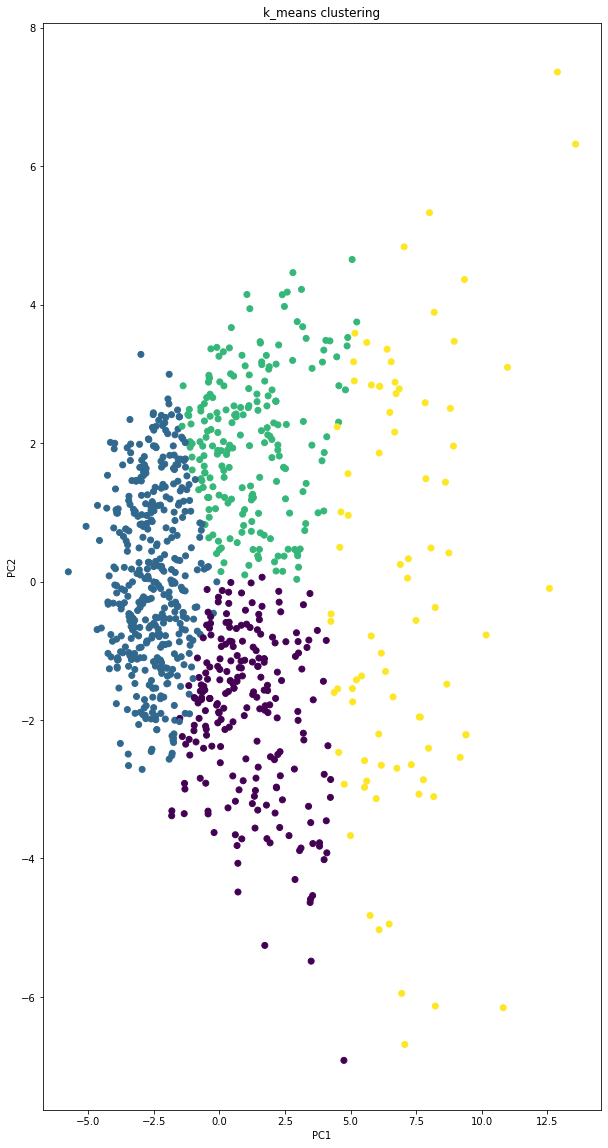

In [42]:
#creating scatterplot
plt.figure(figsize=(10,20))
plt.scatter(x_reduced['PC1'],x_reduced['PC2'],c=x_reduced['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k_means clustering')
plt.show()

In [43]:
#getting cluster centeriod
kmeans.cluster_centers_

array([[ 0.46556055,  0.55926924,  0.35336015,  0.32198043,  0.4572363 ,
        -0.34655498,  0.92325983,  0.93205674,  0.73418207,  0.10510649,
         0.0179954 ,  0.52583713, -0.40205274, -0.06526349, -0.19439686,
         0.70698349,  0.63073909, -0.32131434,  0.37866734],
       [-0.69675343, -0.83602175, -0.75183324, -0.74922829, -0.73588158,
        -0.2971408 , -0.31372174, -0.30692331, -0.08711157, -0.64263611,
        -0.64356247, -0.22531044, -0.54695162, -0.65751767, -0.64276453,
        -0.47842207, -0.62554491, -0.37270556, -0.68253331],
       [ 0.57189148,  0.30609142,  0.21026652,  0.25894026,  0.10762603,
         0.81230851, -0.58208947, -0.61413413, -0.69560175,  0.26849045,
         0.36782113, -0.23696769,  0.98030633,  0.74113847,  0.85890634,
        -0.35188477, -0.03130402,  0.73141445,  0.11241539],
       [ 0.83956206,  1.98369299,  2.35800301,  2.30472049,  2.25772389,
         0.37781635,  0.59769253,  0.62132152,  0.24052851,  2.32267767,
         2.308